In [2]:
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file_path = "../data/code_refinement/ref-valid.jsonl"

In [4]:
data = [json.loads(line) for line in open(file_path)]

In [5]:
len(data)

13103

In [6]:
print(data[0].keys())

dict_keys(['old_hunk', 'oldf', 'hunk', 'comment', 'ids', 'repo', 'ghid', 'old', 'new', 'lang'])


In [7]:
# {
#     "old_file": "import torch",  # f1
#     "diff_hunk": "@@ -1 +1,2 @@\n import torch\n +import torch.nn as nn",  # f1->f2
#     "comment": "I don't think we need to import torch.nn here.",  # requirements for f2->f3
#     "target": "import torch"  # f3
# }

In [8]:
# Quality Estimation: input with "old_file" and "diff_hunk", we need to predict that whether the code change is not good and needs a comment.

# Comment Generation: input with "old_file" and "diff_hunk", we need to generate a comment for the change. An expected comment is as the "comment" above.

# Code Refinement: input with "old_file", "diff_hunk", and "comment", we need to change the code again according to the review comment. For the above example, as the comment indicated we don't need import torch.nn, we just delete this line of code here.

In [10]:
# i = 40
i = 45
# print('>>> OLDF ******************************************')
# print(data[i]['oldf'])
print('>>> OLD ******************************************')
print(data[i]['old'])
print('>>> OLD_HUNK ******************************************')
print(data[i]['old_hunk'])
print('>>> HUNK ******************************************')
print(data[i]['hunk'])
print('>>> COMMENT ******************************************')
print(data[i]['comment'])
print('>>> NEW ******************************************')
print(data[i]['new'])
# print(data[0]['id'])
# print(data[0]['proj'])
# print(data[0]['lang'])

>>> OLD ******************************************
 	 */
 	public function exclude_divi_css_from_combine( $exclude_css ) {
-		if ( (bool) $this->options->get( 'minify_concatenate_css', 0 ) ) {
 			return $exclude_css;
 		}
>>> OLD_HUNK ******************************************
@@ -172,4 +174,27 @@ public function disable_divi_jquery_body() {
 		}
 
 	}
+
+	/**
+	 * Excludes Divi's CSS files from CSS combination
+	 *
+	 * @since 3.10
+	 *
+	 * @param array $exclude_css An array of CSS  to be excluded.
+	 *
+	 * @return array the updated array of paths
+	 */
+	public function exclude_divi_css_from_combine( $exclude_css ) {
+
+		if ( (bool) $this->options->get( 'minify_concatenate_css', 0 ) ) {
>>> HUNK ******************************************
@@ -186,7 +186,7 @@ class Divi implements Subscriber_Interface {
 	 */
 	public function exclude_divi_css_from_combine( $exclude_css ) {
 
-		if ( (bool) $this->options->get( 'minify_concatenate_css', 0 ) ) {
+		if ( ! (bool) $this->options->get(

In [35]:
# print(data[0]['patch'])

In [75]:
len(data[1]['msg'])

294

In [31]:
# print(data[0]['oldf'])

In [93]:
comment_lens = [len(d['msg']) for d in data]
comment_lens.sort()

In [104]:
patch_lens = [len(d['patch']) for d in data]
patch_lens.sort()

In [111]:
def plot_histogram(data, title):
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
    x = np.array(data)
    plt.hist(x, bins=50)
    plt.gca().set(title=title, label='Frequency');

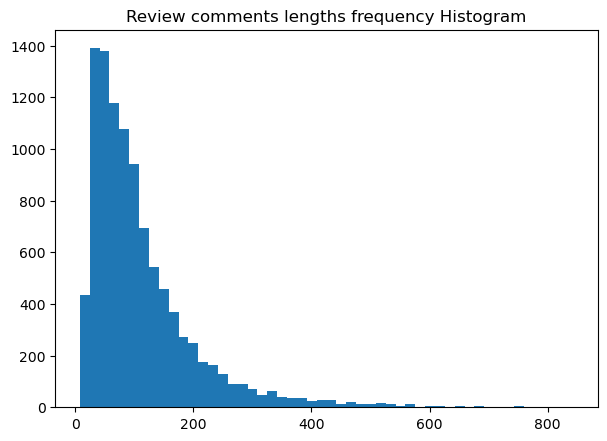

In [112]:
plot_histogram(comment_lens, 'Review comments lengths frequency Histogram')

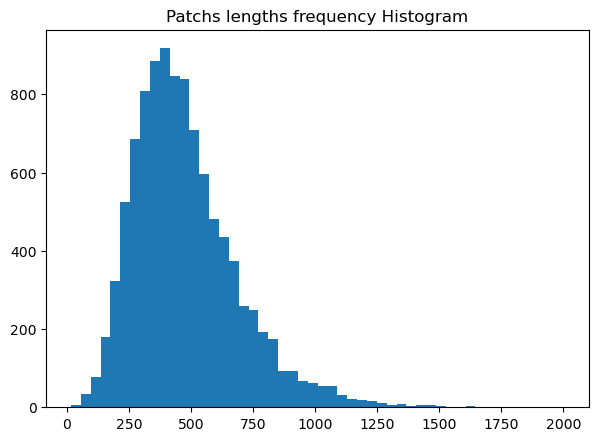

In [116]:
plot_histogram(patch_lens[:-10], 'Patchs lengths frequency Histogram')

In [125]:
sum([i<=500 for i in patch_lens])

6260

In [126]:
len(patch_lens)

10169

In [136]:
patch_lens[-10]

2017

In [137]:
x = None
y = None
for d in data:
    if len(d['patch']) == patch_lens[-10]:
        x = d['patch']
        y = d['msg']
        break

In [138]:
x

"@@ -441,10 +441,15 @@ func NewConfig(dc *dynamicconfig.Collection, numberOfShards int32, isAdvancedVis\n \t\tESIndexMaxResultWindow:            dc.GetIntProperty(dynamicconfig.FrontendESIndexMaxResultWindow, 10000),\n \t\tIndexerConcurrency:                dc.GetIntProperty(dynamicconfig.WorkerIndexerConcurrency, 100),\n \t\tESProcessorNumOfWorkers:           dc.GetIntProperty(dynamicconfig.WorkerESProcessorNumOfWorkers, 1),\n-\t\tESProcessorBulkActions:            dc.GetIntProperty(dynamicconfig.WorkerESProcessorBulkActions, 1000),\n-\t\tESProcessorBulkSize:               dc.GetIntProperty(dynamicconfig.WorkerESProcessorBulkSize, 2<<24), // 16MB\n-\t\tESProcessorFlushInterval:          dc.GetDurationProperty(dynamicconfig.WorkerESProcessorFlushInterval, 1*time.Second),\n-\t\tESProcessorAckTimeout:             dc.GetDurationProperty(dynamicconfig.WorkerESProcessorAckTimeout, 1*time.Minute),\n+\t\t// Should be not greater than NumberOfShards(512)/NumberOfHistoryNodes(4) * VisibilityTas

In [12]:
langs = set()
for d in data:
    langs.add(d['lang'])
print(langs)

{'.cs', 'cpp', 'py', 'js', 'php', 'go', 'rb', 'c', 'java'}
